# Time Series & Forecasting

## Exercise 1: 

`data/babies.zip` contains baby name frequencies per year (one file per year). You can treat each baby name as its own time series 

1. Combine all of the files within the `babies.zip` file into one **DataFrame**
2. Get the autocorrelation and partial autocorrelation for the names `Olivia`, `Newton` and `John` (*difference* as needed)
3. Pick any **3** names of your choice and using **3** different ARIMA models, forecast the frequencies for each these names for the next **2** years. Provide brief interpretations of your results
**NOTE:** You are expected to use visualizations/data exploration, split your data into training & testing sets, evaluate your model, and then predict into the unknown

In [1]:
# exercise 1

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.statespace.tools import diff

#!pip install pmdarima
from pmdarima import auto_arima 





### 1.1 - COMBINE ALL FILES

In [2]:

  
# specifying the zip file name
#babies_files_path = "../data/babies"
  
# Change the directory
cwd = os.getcwd()



# iterate through all files, then read the file, then concatenate into the same Dataframe
df = pd.DataFrame()
for file in os.scandir(cwd):
    #print(f'current File: {file}')
    if file.is_file() and file.name[-4:]=='.txt':
        file_path = f"{file.path}"
        with open (file_path, "r") as stream:
            df_current = pd.read_csv(file_path, sep=",", header=None, names=['name','sex','number'], verbose=True)
            df_current['year']=file.name[3:7]
            stream.close()
    
        df=pd.concat([df,df_current])
            

df

Tokenization took: 4.76 ms
Type conversion took: 20.52 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 16.86 ms
Type conversion took: 19.67 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 2.63 ms
Type conversion took: 2.40 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 0.44 ms
Type conversion took: 1.21 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 0.40 ms
Type conversion took: 1.40 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 0.35 ms
Type conversion took: 1.83 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 0.42 ms
Type conversion took: 2.09 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 0.87 ms
Type conversion took: 2.13 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 4.53 ms
Type conversion took: 9.69 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 10.05 ms
Type conversion took: 76.97 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 3.58 ms
Type conversion took: 13.61 ms
Parser 

Tokenization took: 1.51 ms
Type conversion took: 2.73 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 0.86 ms
Type conversion took: 2.28 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 1.76 ms
Type conversion took: 4.18 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 0.83 ms
Type conversion took: 3.38 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 3.90 ms
Type conversion took: 6.80 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 1.78 ms
Type conversion took: 5.65 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 3.95 ms
Type conversion took: 6.27 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 4.05 ms
Type conversion took: 43.40 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 1.74 ms
Type conversion took: 4.67 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 0.94 ms
Type conversion took: 85.50 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 5.77 ms
Type conversion took: 10.75 ms
Parser mem

,name,sex,number,year
0,Emily,F,25953,2000
1,Hannah,F,23078,2000
2,Madison,F,19967,2000
3,Ashley,F,17996,2000
4,Sarah,F,17691,2000
...,...,...,...,...
9032,Winfrey,M,5,1935
9033,Yancy,M,5,1935
9034,Yazzie,M,5,1935
9035,Zaragoza,M,5,1935


In [3]:
df_babies = df.sort_values(by='year').reset_index(level=None)
df_babies

,index,name,sex,number,year
0,922,Rosalee,F,5,1880
1,726,Rella,F,7,1880
2,727,Rillie,F,7,1880
3,728,Rosanna,F,7,1880
4,729,Theo,F,7,1880
...,...,...,...,...,...
1891889,21919,Jancarlos,M,36,2016
1891890,21920,Javin,M,36,2016
1891891,21921,Jaydyn,M,36,2016
1891892,21827,Kaynen,M,38,2016


In [4]:
df_babies['name'] = df_babies['name'].convert_dtypes(convert_string=True)
df_babies['sex'] = df_babies['sex'].convert_dtypes(convert_string=True)
df_babies['year'] = df_babies['year'].astype(int)
df_babies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891894 entries, 0 to 1891893
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   index   int64 
 1   name    string
 2   sex     string
 3   number  int64 
 4   year    int64 
dtypes: int64(3), string(2)
memory usage: 72.2 MB


In [5]:
df_babies

,index,name,sex,number,year
0,922,Rosalee,F,5,1880
1,726,Rella,F,7,1880
2,727,Rillie,F,7,1880
3,728,Rosanna,F,7,1880
4,729,Theo,F,7,1880
...,...,...,...,...,...
1891889,21919,Jancarlos,M,36,2016
1891890,21920,Javin,M,36,2016
1891891,21921,Jaydyn,M,36,2016
1891892,21827,Kaynen,M,38,2016


### 1.2 - Get the autocorrelation and partial autocorrelation for the names Olivia, Newton and John 
(difference as needed)
i.e

Ref: A stationary time series is one whose mean, variance & autocorrelation are constant over time.
A time series is said to be stationary if it does not exhibit trend and seasonality

In [64]:
def prep_timeserie_df(df, name):
    name_df = 'df_'+ name
    name_df = df[df['name']==name]

    name_df = name_df[['year', 'number']].sort_values(by='year').reset_index(level=None)
    # To use year as index, we must get unique years
    name_df = name_df.groupby('year')['number'].agg(np.sum).reset_index()
    
    name_df.index = pd.to_datetime(name_df.year) # Replace index by the year index 01/01/year
    name_df = name_df[['number']] # Get the updated df
    
    
    return name_df['number']


In [65]:
# Two functions to help better interpret ADF and KPSS results (via Statsmodels Documentation) 

from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    print('\n')
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    print('\n')
    
    if dfoutput['p-value'] < 0.05:
        print('Strong evidence against the null hypothesis')
        print('We reject the null hypothesis')
        print('Series has no unit root & is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('We fail to reject the null hypothesis')
        print('Series has unit root and is non-stationary')
        
##############################################################
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    print('\n')
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    print('\n')
    
    if kpss_output['p-value'] < 0.05:
        print('Strong evidence against the null hypothesis')
        print('We reject the null hypothesis')
        print('Series has unit root and is non-stationary')
    else:        
        print('Weak evidence against the null hypothesis')
        print('We fail to reject the null hypothesis')
        print('Series has no unit root & is stationary')

In [82]:
def evaluate_stationary(time_serie):
    adf_test(time_serie)
    kpss_test(time_serie)

In [89]:
df_Olivia = prep_timeserie_df(df, 'Olivia')
df_Newton = prep_timeserie_df(df, 'Newton')
df_John = prep_timeserie_df(df, 'John')


 ### Attempt to discover the AR or MR degrees
 
 https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook

1. If the Series are not stationary. differentiate it.
2. Once Stationary:
        -AR: If ACF is in a Geometric decay -> check PACF for AR degree
        -MA: If PACF is in a Geometric decay-> check ACF for MA degree
        -Seasonality:The ACF shows a period . Check ACF and PACF for when is the correlation =1 again to find the PERIOD. 
        -Trend: check ACF for when the correlation is high(~>1) but less than 1.  
        

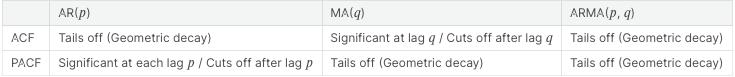

### 1.2.1 - Olivia

In [84]:
evaluate_stationary(df_Olivia)

Results of Dickey-Fuller Test:


Test Statistic                  -0.333287
p-value                          0.920656
#Lags Used                      10.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has unit root and is non-stationary
Results of KPSS Test:


Test Statistic           1.140299
p-value                  0.010000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has unit root and is non-stationary


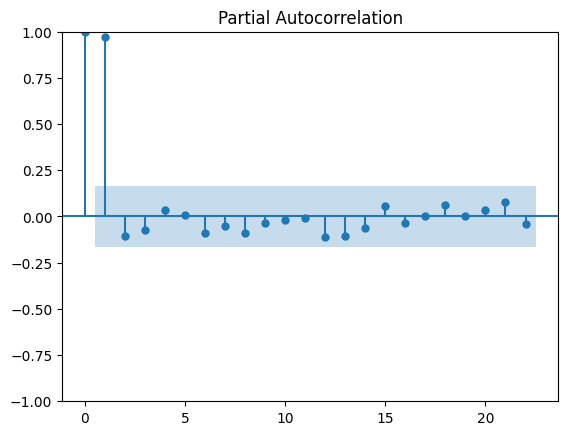

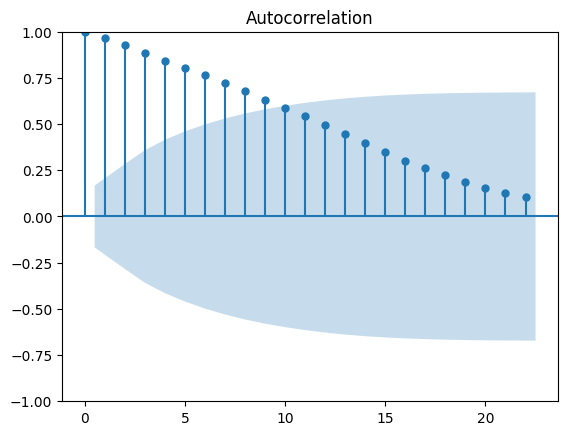

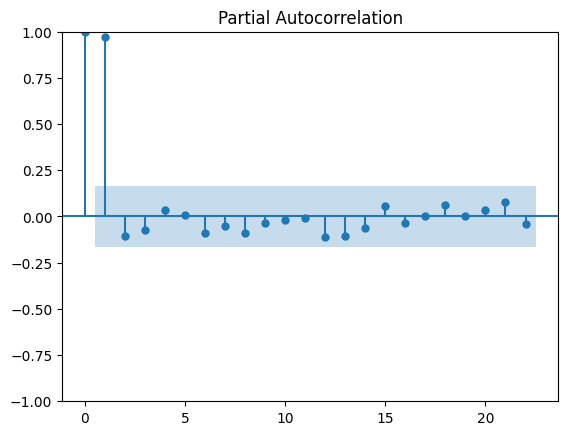

In [115]:
plot_acf(df_Olivia) # GEOMETRIC Decay

plot_pacf(df_Olivia) # PACF: lag 1


In [ ]:
# INTERPRETATION on OLIVIA:

# Both ADF, KPSS tests indicate non-stationarity ( ADF Pvalue >0.05 & KPSS Pvalue<0.05): 
# The data is not stationary
# There is a TREND and SEASONALITY
# Since ACF shows a Geometric Decay we can focus on PACF:
# PACF shows the 1st left lag sticking out of the 95% Confidence Interval
# => Lag =1

# We Repeat until the ADF / KPSS test indicate the serie is Stationary

In [117]:
# from statsmodels.tsa.statespace.tools import diff

df_Olivia_d1 = diff(df_Olivia,k_diff=1)

Results of Dickey-Fuller Test:


Test Statistic                  -1.646061
p-value                          0.459096
#Lags Used                       9.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has unit root and is non-stationary
Results of KPSS Test:


Test Statistic           0.982036
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has unit root and is non-stationary


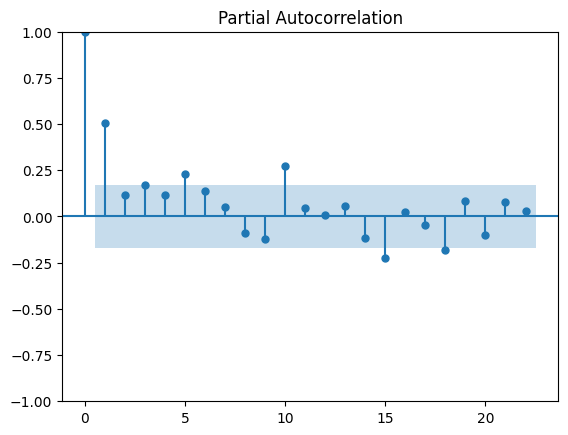

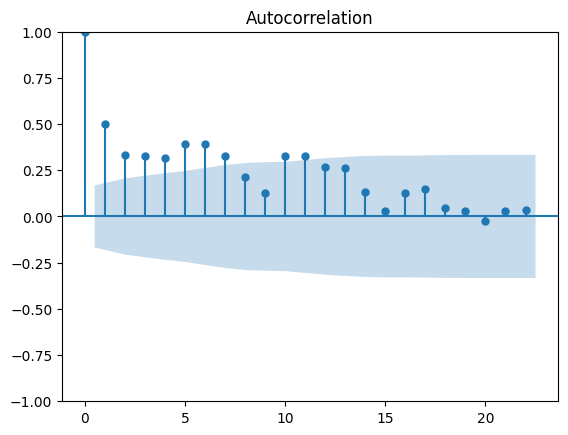

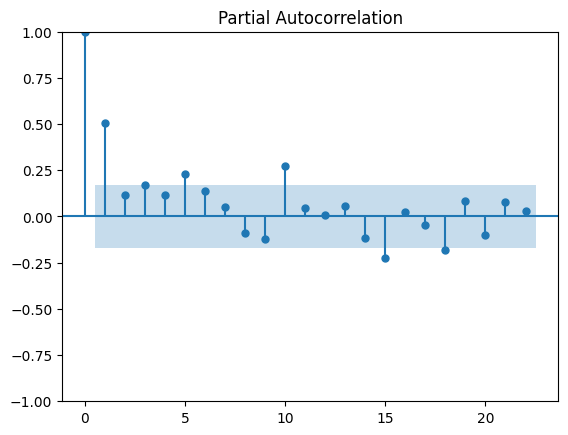

In [118]:
evaluate_stationary(df_Olivia_d1)
plot_acf(df_Olivia_d1)

plot_pacf(df_Olivia_d1) 


In [127]:
df_Olivia_d2 = diff(df_Olivia,k_diff=2)

Results of Dickey-Fuller Test:


Test Statistic                  -2.377150
p-value                          0.148290
#Lags Used                      13.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has unit root and is non-stationary
Results of KPSS Test:


Test Statistic            0.156036
p-value                   0.100000
Lags Used                33.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has no unit root & is stationary


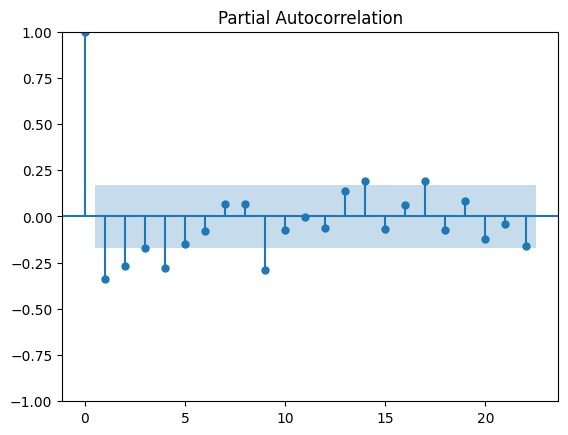

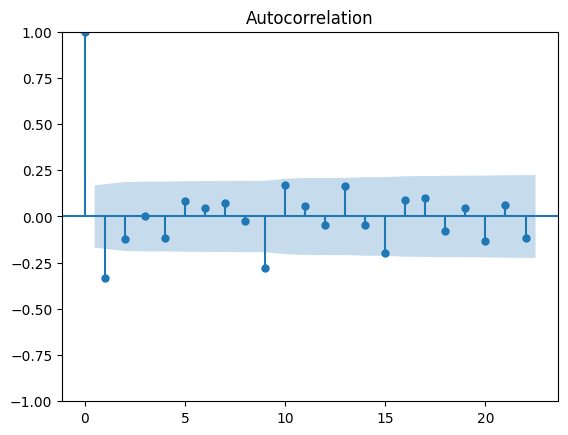

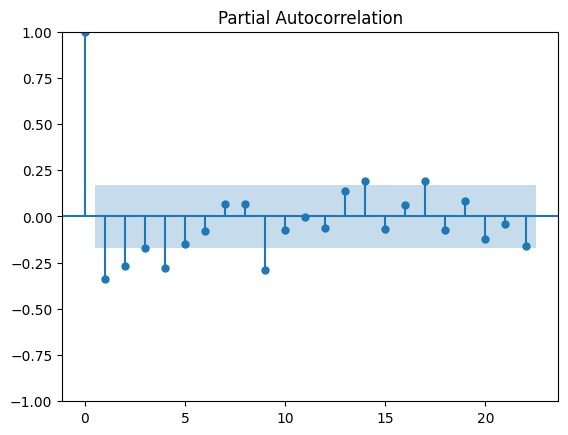

In [128]:
evaluate_stationary(df_Olivia_d2)

plot_acf(df_Olivia_d2)
plot_pacf(df_Olivia_d2) 


# INTERPRETATION on Oliva:
# The ADF test indicates stationarity and the KPSS test indicates non-stationarity ( ADF Pvalue <0.05 & KPSS Pvalue<0.05: 
# The serie is difference stationary

# There is a TREND and SEASONALITY
# Since ACF shows a Geometric Decay we can focus on PACF:
# PACF shows the 1st, and 2nd left lags sticking out of the 95% Confidence Interval
# => Lag =2

# We Repeat the diff until the ADF / KPSS test indicate the serie is Stationary

Results of Dickey-Fuller Test:


Test Statistic                  -5.411562
p-value                          0.000003
#Lags Used                      13.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has no unit root & is stationary
Results of KPSS Test:


Test Statistic            0.116923
p-value                   0.100000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has no unit root & is stationary


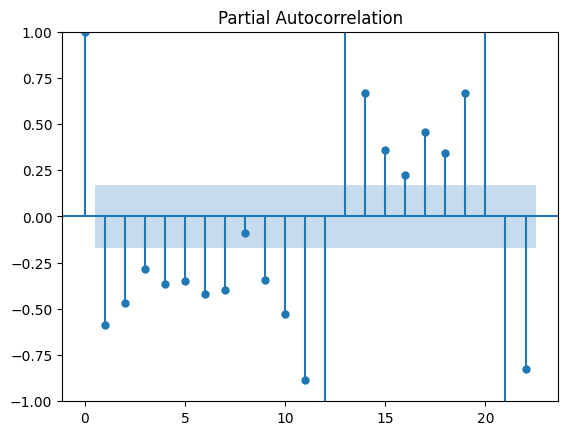

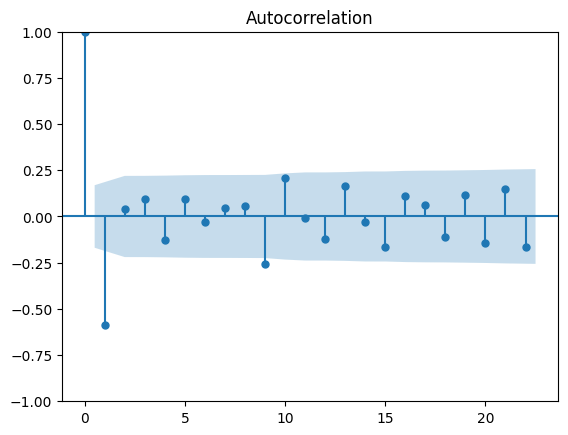

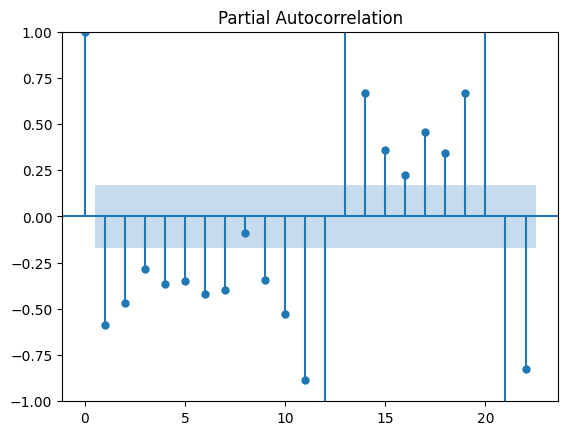

In [129]:
df_Olivia_d3 = diff(df_Olivia,k_diff=3)
evaluate_stationary(df_Olivia_d3)

plot_acf(df_Olivia_d3)
plot_pacf(df_Olivia_d3) 

# This time, Both tests indicate stationarity ( ADF Pvalue <0.05 & KPSS Pvalue>0.05: 
# => The data is STATIONARY
# => AR = 3

### 1.2.2 - Newton

Results of Dickey-Fuller Test:


Test Statistic                  -1.956684
p-value                          0.305882
#Lags Used                       4.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has unit root and is non-stationary
Results of KPSS Test:


Test Statistic           0.674778
p-value                  0.015838
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has unit root and is non-stationary


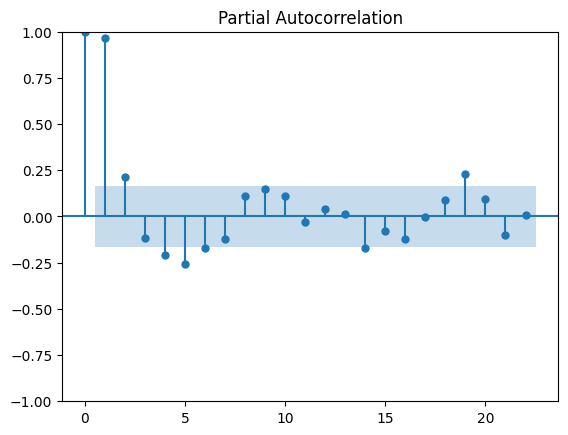

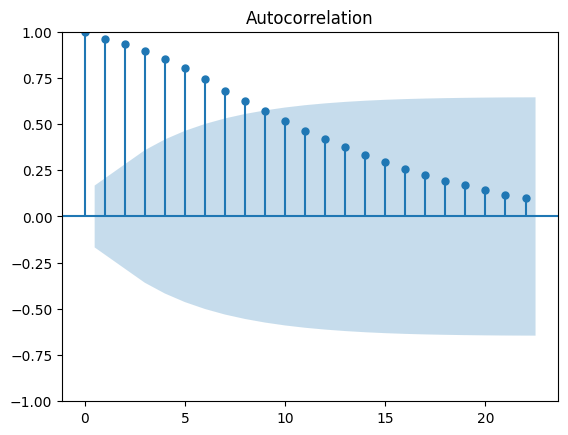

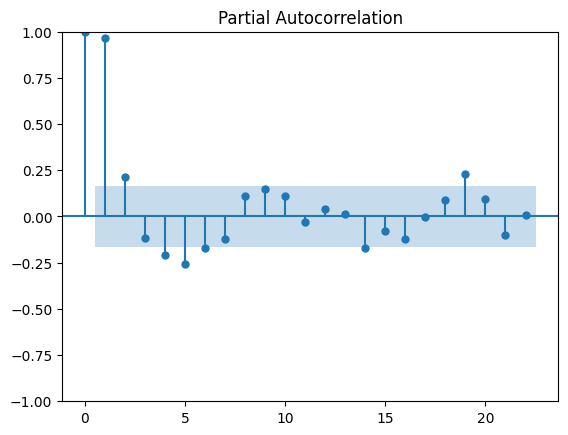

In [131]:
evaluate_stationary(df_Newton)
plot_acf(df_Newton) # GEOMETRIC Decay

plot_pacf(df_Newton) # PACF: lag 2

# The ADF test indicates stationarity and the KPSS test indicates non-stationarity ( ADF Pvalue <0.05 & KPSS Pvalue<0.05: 
# The serie is Not stationary

# INTERPRETATION on Newton:

# Both ADF, KPSS tests indicate non-stationarity ( ADF Pvalue >0.05 & KPSS Pvalue<0.05): 
# The data is not stationary
# There is a TREND and SEASONALITY
# Since ACF shows a Geometric Decay we can focus on PACF:
# PACF shows the 1st, and 2nd left lags sticking out of the 95% Confidence Interval
# => Lag =2

# We Repeat the diff until the ADF / KPSS test indicate the serie is Stationary

Results of Dickey-Fuller Test:


Test Statistic                -8.696708e+00
p-value                        3.907246e-14
#Lags Used                     4.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has no unit root & is stationary
Results of KPSS Test:


Test Statistic             0.445468
p-value                    0.057557
Lags Used                111.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has no unit root & is stationary


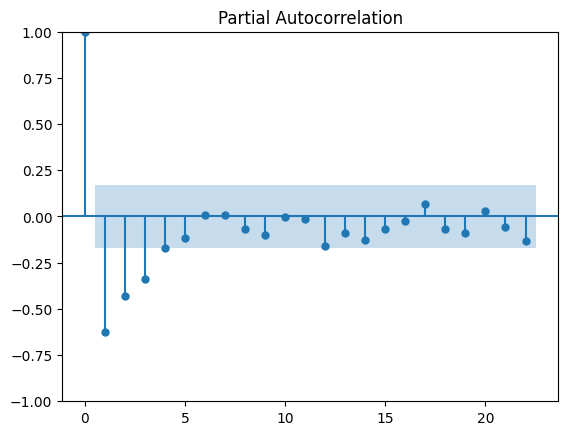

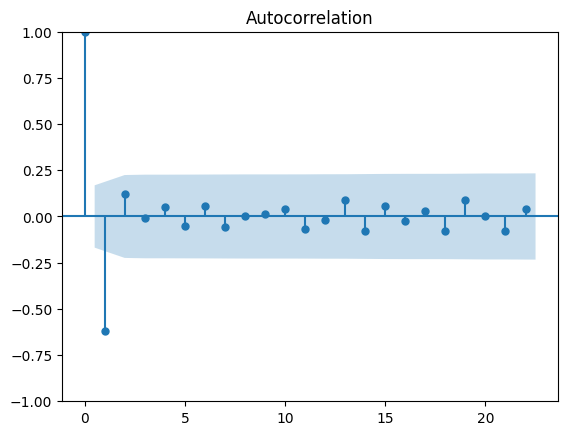

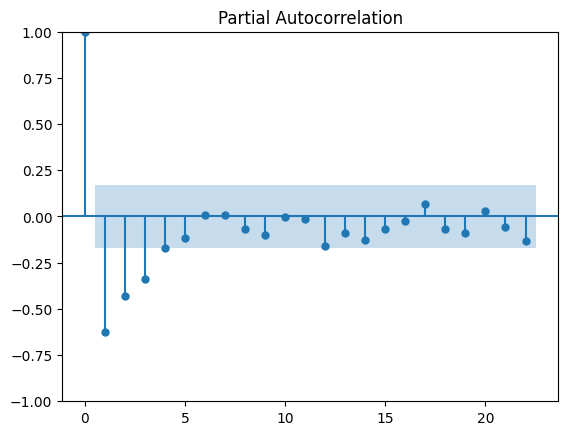

In [135]:
# from statsmodels.tsa.statespace.tools import diff

df_Newton_d2 = diff(df_Newton,k_diff=2)

evaluate_stationary(df_Newton_d2)

plot_acf(df_Newton_d2)
plot_pacf(df_Newton_d2) 

# This time, Both tests indicate stationarity ( ADF Pvalue <0.05 & KPSS Pvalue>0.05): 
# => The data is STATIONARY
# => AR = 2

### 1.2.3 - John

Results of Dickey-Fuller Test:


Test Statistic                  -1.796373
p-value                          0.382264
#Lags Used                       5.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has unit root and is non-stationary
Results of KPSS Test:


Test Statistic           0.482847
p-value                  0.045530
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has unit root and is non-stationary


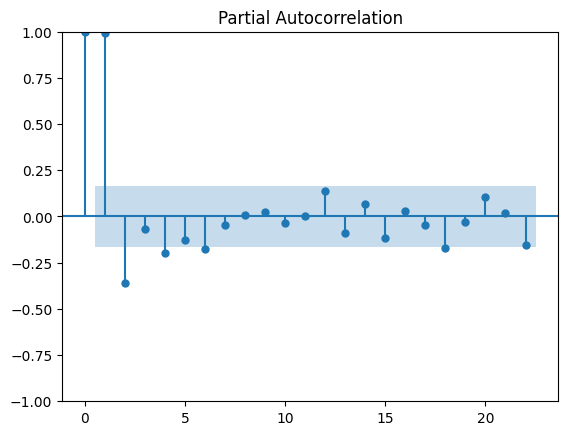

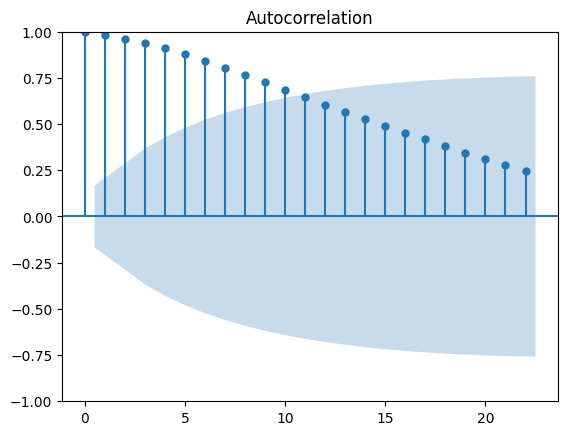

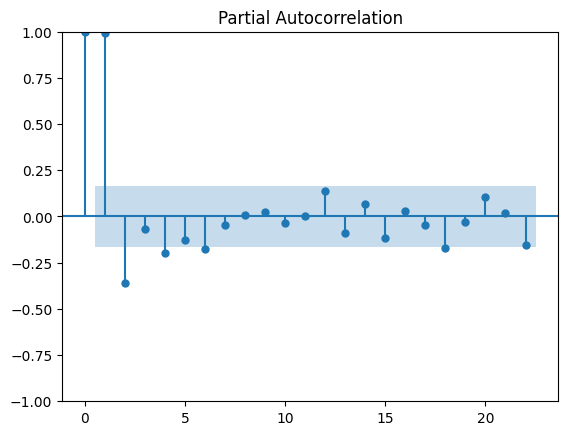

In [134]:
evaluate_stationary(df_John)

plot_acf(df_John)
plot_pacf(df_John) 

# INTERPRETATION on John:
# The ADF test indicates stationarity and the KPSS test indicates non-stationarity ( ADF Pvalue <0.05 & KPSS Pvalue<0.05: 
# The serie is difference stationary

# There is a TREND and SEASONALITY
# Since ACF shows a Geometric Decay we can focus on PACF:
# PACF shows the 1st, and 2nd left lags sticking out of the 95% Confidence Interval
# => Lag =2

# We Repeat until the diff and ADF / KPSS test indicate the serie is Stationary

Results of Dickey-Fuller Test:


Test Statistic                  -4.270993
p-value                          0.000498
#Lags Used                      12.000000
Number of Observations Used    122.000000
Critical Value (1%)             -3.485122
Critical Value (5%)             -2.885538
Critical Value (10%)            -2.579569
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has no unit root & is stationary
Results of KPSS Test:


Test Statistic            0.167207
p-value                   0.100000
Lags Used                50.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has no unit root & is stationary


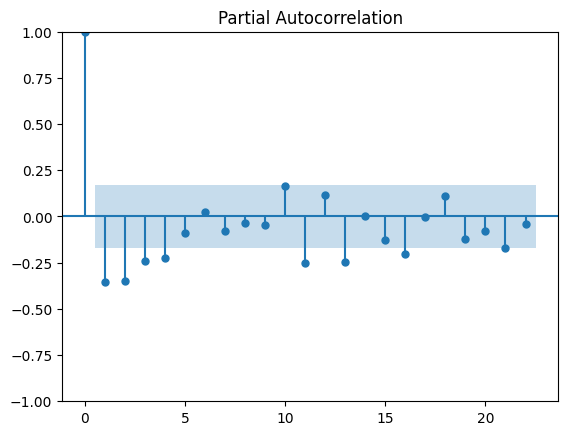

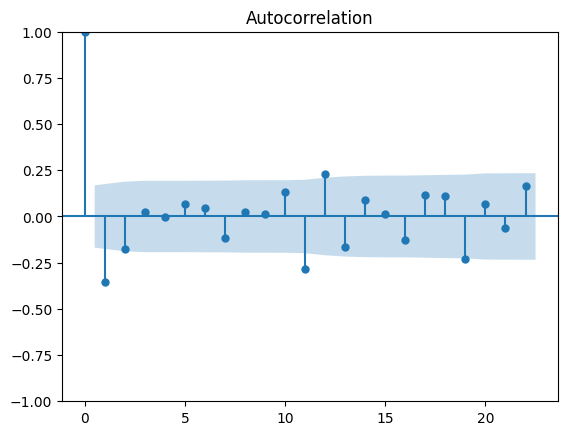

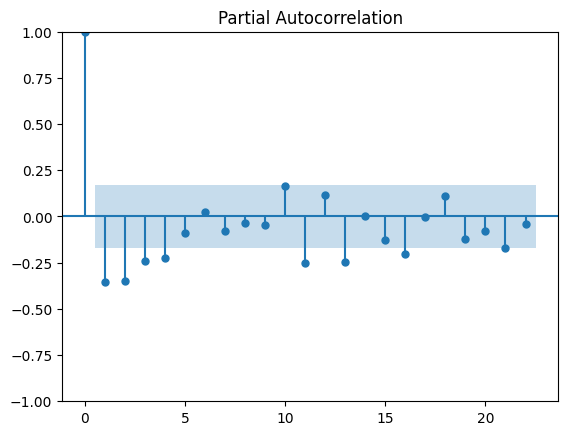

In [136]:
df_John_d2 = diff(df_John,k_diff=2)

evaluate_stationary(df_John_d2)

plot_acf(df_John_d2)
plot_pacf(df_John_d2) 

# This time, Both tests indicate stationarity ( ADF Pvalue <0.05 & KPSS Pvalue>0.05): 
# => The data is STATIONARY
# => AR = 2


## 1.3 - Pick any 3 names of your choice and using 3 different ARIMA models, forecast the frequencies for each these names for the next 2 years. Provide brief interpretations of your results
NOTE: You are expected to use visualizations/data exploration, split your data into training & testing sets, evaluate your model, and then predict into the unknown

In [137]:
df_Theo = prep_timeserie_df(df, 'Theo')
df_Laurence = prep_timeserie_df(df, 'Laurence')
df_Samuel = prep_timeserie_df(df, 'Samuel')



Results of Dickey-Fuller Test:


Test Statistic                   2.115148
p-value                          0.998805
#Lags Used                       3.000000
Number of Observations Used    133.000000
Critical Value (1%)             -3.480500
Critical Value (5%)             -2.883528
Critical Value (10%)            -2.578496
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has unit root and is non-stationary
Results of KPSS Test:


Test Statistic           0.380171
p-value                  0.085702
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has no unit root & is stationary


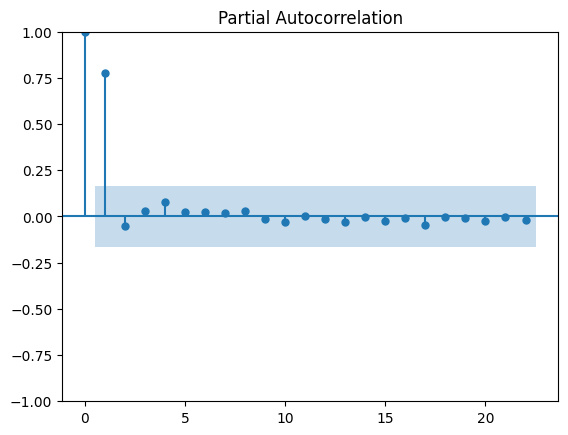

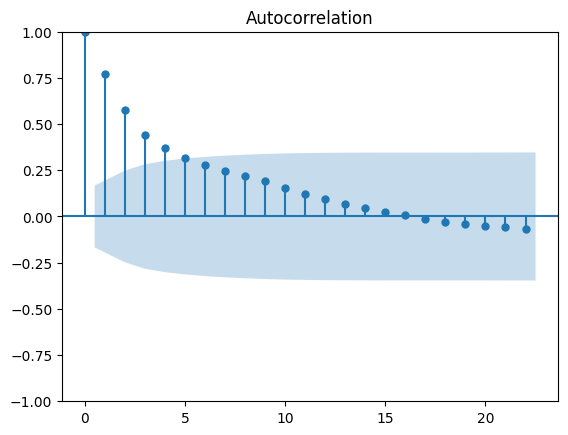

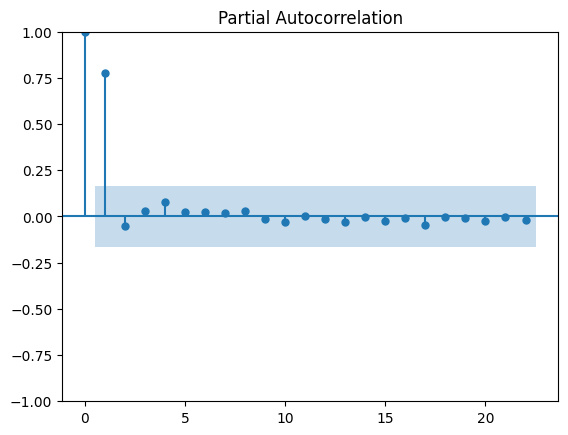

In [138]:
evaluate_stationary(df_Theo)

plot_acf(df_Theo)
plot_pacf(df_Theo) 

# ACF : Geometric decay
# PACF shows : We must differentiate by 1 lag

Results of Dickey-Fuller Test:


Test Statistic                  -1.625935
p-value                          0.469619
#Lags Used                       4.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has unit root and is non-stationary
Results of KPSS Test:


Test Statistic           0.458553
p-value                  0.051917
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has no unit root & is stationary


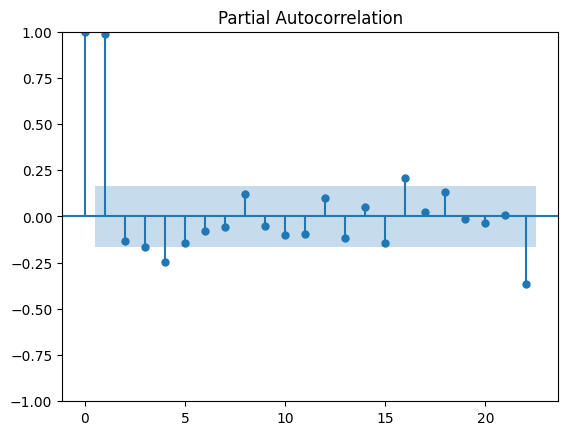

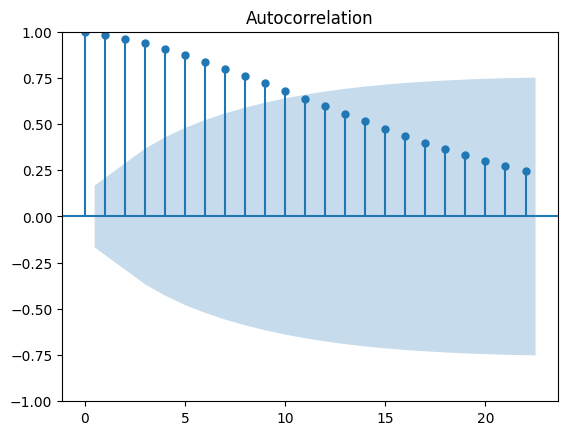

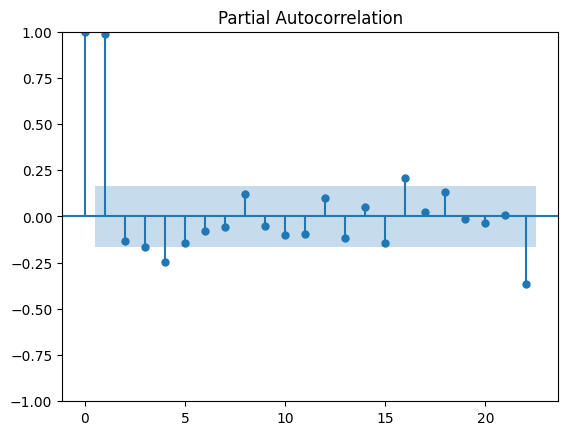

In [139]:
evaluate_stationary(df_Laurence)

plot_acf(df_Laurence)
plot_pacf(df_Laurence) 

#ACF: Geometric Decay
# PACF : We must differentiate by 1 lag

Results of Dickey-Fuller Test:


Test Statistic                  -1.394020
p-value                          0.585140
#Lags Used                       3.000000
Number of Observations Used    133.000000
Critical Value (1%)             -3.480500
Critical Value (5%)             -2.883528
Critical Value (10%)            -2.578496
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has unit root and is non-stationary
Results of KPSS Test:


Test Statistic           1.618398
p-value                  0.010000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has unit root and is non-stationary


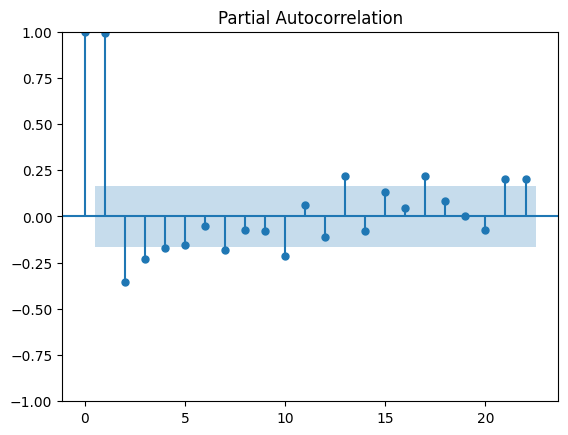

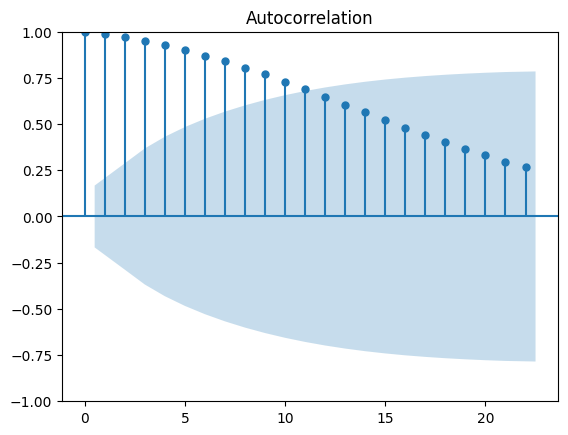

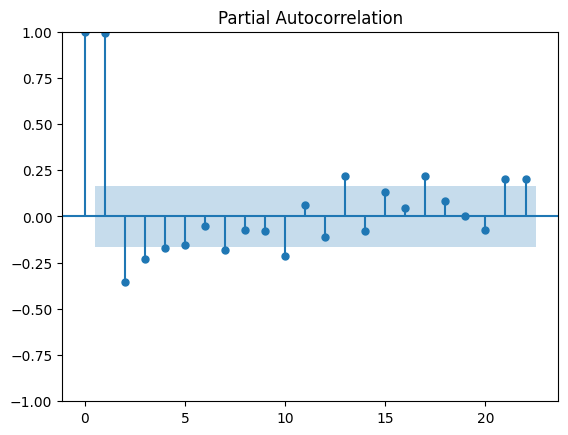

In [140]:
evaluate_stationary(df_Samuel)

plot_acf(df_Samuel)
plot_pacf(df_Samuel) 

# ACF: Geometric decay
# PACF: we must differnetiate by 1 lag

In [143]:
#!pip install pmdarima
from pmdarima import auto_arima 


In [146]:

auto_res = auto_arima(df_Theo,seasonal=False, trace=True)
auto_res.summary()


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1220.846, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1241.357, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1222.181, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1221.240, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1239.823, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1221.430, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1223.465, Time=0.34 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=1222.169, Time=0.52 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=1221.978, Time=0.60 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1222.363, Time=0.15 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=1221.593, Time=0.38 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=1223.811, Time=0.43 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1219.936, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  137
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -604.968
Date:                Sat, 18 Mar 2023   AIC                           1219.936
Time:                        15:09:05   BIC                           1234.462
Sample:                    01-01-1880   HQIC                          1225.839
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6232      0.155      4.008      0.000       0.318       0.928
ar.L2         -0.3461      0.175     -1.982      0.047      -0.688      -0.004
ma.L1         -1.0654      0.148     -7.182      0.000      -1.356      -0.775
ma.L2          0.7425      0.097      7.647      0.000       0.552       0.933
sigma2       454.5081     36.609     12.415      0.000     382.755     526.261
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               286.91
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                             1.25
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:

auto_res = auto_arima(df_Laurence,seasonal=False, trace=True)
auto_res.summary()


        

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1363.827, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1368.414, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1368.105, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1368.566, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1366.419, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1363.308, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1369.109, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1362.991, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1363.800, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1367.461, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1360.992, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1366.571, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1366.109, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1361.801, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  137
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -677.496
Date:                Sat, 18 Mar 2023   AIC                           1360.992
Time:                        15:08:52   BIC                           1369.730
Sample:                    01-01-1880   HQIC                          1364.543
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8647      0.112      7.694      0.000       0.644       1.085
ma.L1         -0.7328      0.143     -5.127      0.000      -1.013      -0.453
sigma2      1241.7344     86.905     14.288      0.000    1071.403    1412.066
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):               108.61
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:

auto_res = auto_arima(df_Samuel,seasonal=False, trace=True)
auto_res.summary()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1924.662, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1965.592, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1940.226, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1951.943, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1969.606, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1922.829, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1937.348, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1923.303, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1924.690, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1934.272, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1922.662, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1923.744, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1924.662, Time=1.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1923.065, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  137
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -956.524
Date:                Sat, 18 Mar 2023   AIC                           1921.047
Time:                        15:08:35   BIC                           1932.698
Sample:                    01-01-1880   HQIC                          1925.782
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6311      0.175      3.597      0.000       0.287       0.975
ar.L2          0.2097      0.111      1.887      0.059      -0.008       0.427
ma.L1         -0.4103      0.175     -2.344      0.019      -0.753      -0.067
sigma2      7.492e+04   6245.453     11.997      0.000    6.27e+04    8.72e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                37.55
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                             0.55
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
train_theo = df_Theo.iloc[:122] # Drop the last 15 years of our data
test_theo = df_Theo.iloc[122:]

In [190]:
test_theo


year
2002-01-01    103
2003-01-01    109
2004-01-01    133
2005-01-01    139
2006-01-01    156
2007-01-01    191
2008-01-01    188
2009-01-01    186
2010-01-01    221
2011-01-01    245
2012-01-01    287
2013-01-01    362
2014-01-01    550
2015-01-01    764
2016-01-01    952
Name: number, dtype: int64

In [154]:
train_laurence = df_Laurence.iloc[:122] # Drop the last 12 months of our data
test_laurence = df_Laurence.iloc[122:]

In [155]:
train_samuel = df_Samuel.iloc[:122] # Drop the last 12 months of our data
test_samuel = df_Samuel.iloc[122:]

In [191]:
test_samuel

year
2002-01-01    14574
2003-01-01    14683
2004-01-01    14157
2005-01-01    14275
2006-01-01    13650
2007-01-01    13364
2008-01-01    12771
2009-01-01    12165
2010-01-01    11982
2011-01-01    11344
2012-01-01    11456
2013-01-01    11119
2014-01-01    10989
2015-01-01    10844
2016-01-01    10507
Name: number, dtype: int64

In [160]:
# FITTING MODELS

from statsmodels.tsa.arima.model import ARIMA

# Using p,d,q values found by auto_arima above
model_theo = ARIMA(train_theo, order=(2,2,2)).fit()

model_theo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 number   No. Observations:                  122
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -490.571
Date:                Sat, 18 Mar 2023   AIC                            991.141
Time:                        15:25:12   BIC                           1005.079
Sample:                    01-01-1880   HQIC                           996.801
                         - 01-01-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8525      0.879     -0.970      0.332      -2.575       0.870
ar.L2         -0.1750      0.145     -1.206      0.228      -0.459       0.109
ma.L1         -0.2397      0.882     -0.272      0.786      -1.968       1.488
ma.L2         -0.5891      0.804     -0.733      0.464      -2.165       0.987
sigma2       204.6614     18.076     11.322      0.000     169.234     240.089
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                38.36
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.43
Prob(H) (two-sided):                  0.72   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
model_laurence = ARIMA(train_laurence, order=(1,1,1)).fit()

model_laurence.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 number   No. Observations:                  122
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -609.234
Date:                Sat, 18 Mar 2023   AIC                           1224.469
Time:                        15:25:32   BIC                           1232.856
Sample:                    01-01-1880   HQIC                          1227.875
                         - 01-01-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8638      0.125      6.913      0.000       0.619       1.109
ma.L1         -0.7299      0.159     -4.585      0.000      -1.042      -0.418
sigma2      1381.5324    108.613     12.720      0.000    1168.654    1594.411
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                70.80
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.69
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
model_samuel = ARIMA(train_samuel, order=(2,1,1)).fit()

model_samuel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 number   No. Observations:                  122
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -848.079
Date:                Sat, 18 Mar 2023   AIC                           1704.158
Time:                        15:25:49   BIC                           1715.342
Sample:                    01-01-1880   HQIC                          1708.700
                         - 01-01-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9098      0.190      4.792      0.000       0.538       1.282
ar.L2          0.0047      0.146      0.032      0.975      -0.282       0.291
ma.L1         -0.6244      0.151     -4.144      0.000      -0.920      -0.329
sigma2      7.129e+04   6112.779     11.663      0.000    5.93e+04    8.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                47.19
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                             0.73
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [163]:
#Prep TESTS Predictions Theo
start_theo = len(train_theo)
end_theo = len(train_theo) + len(test_theo) - 1 # We want to predict our entire DF - 1 because the end is *inclusive*. 

#Prep TESTS Predictions Laurence
start_laurence = len(train_laurence)
end_laurence =  len(train_laurence) + len(test_laurence) - 1 

#Prep TESTS Predictions Samuel
start_samuel = len(train_samuel)
end_samuel = len(train_samuel) + len(test_samuel) - 1 



In [164]:

predictions_theo = model_theo.predict(start=start_theo, end=end_theo, typ='levels').rename('Predictions THEO')
predictions_laurence = model_laurence.predict(start=start_laurence, end=end_laurence, typ='levels').rename('Predictions LAURENCE')
predictions_samuel = model_samuel.predict(start=start_samuel, end=end_samuel, typ='levels').rename('Predictions SAMUEL')

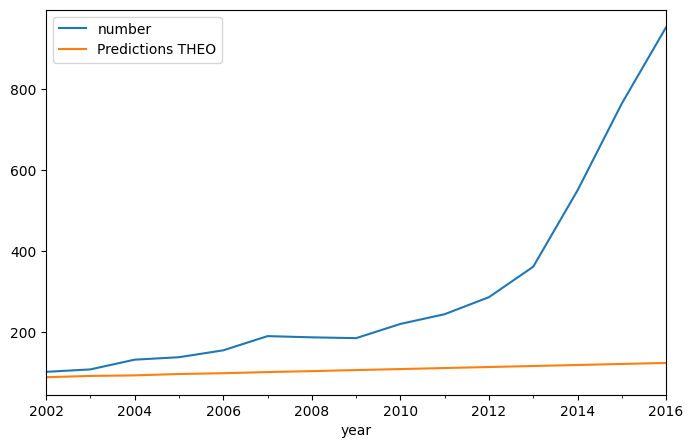

In [174]:
# PLOTTINGS

test_theo.plot(figsize=(8,5), legend=True)
predictions_theo.plot(legend=True);


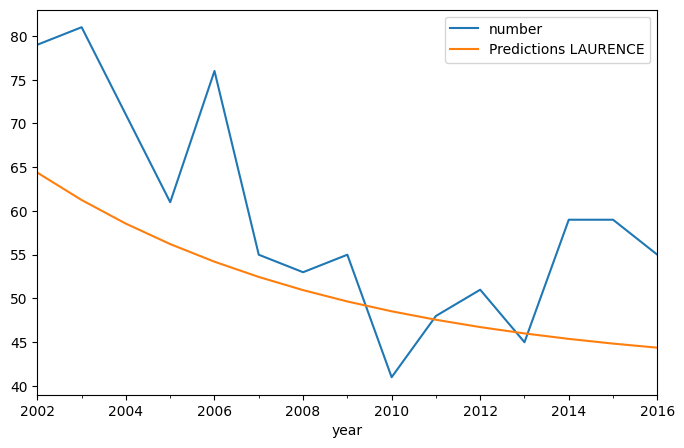

In [172]:

test_laurence.plot(figsize=(8,5), legend=True)
predictions_laurence.plot(legend=True);


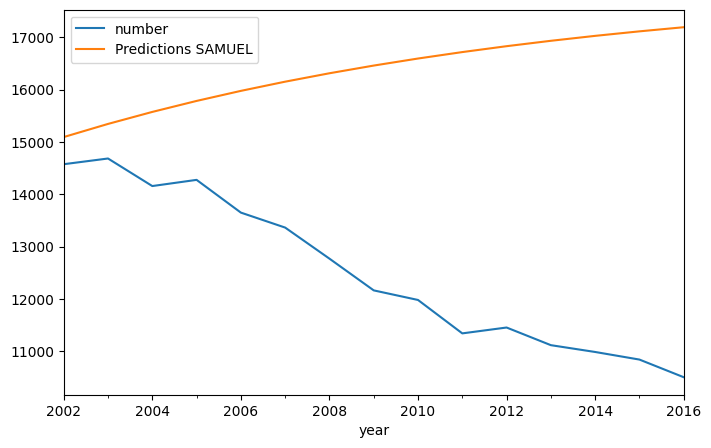

In [173]:

test_samuel.plot(figsize=(8,5), legend=True)
predictions_samuel.plot(legend=True);

In [201]:
# 2 YEARS PREDICTIONS

#Prep TESTS Predictions Theo
start_theo = len(df_Theo)
end_theo = len(df_Theo) -1 + 2 # We want to predict our entire DF - 1 because the end is *inclusive*. 

#Prep TESTS Predictions Laurence
start_laurence = len(df_Laurence)
end_laurence =   len(df_Laurence) - 1 + 2

#Prep TESTS Predictions Samuel
start_samuel = len(df_Samuel)
end_samuel = len(df_Samuel) - 1 + 2

In [184]:

forecast_theo = model_theo.predict(start=start_theo, end=end_theo, typ='levels').rename('forecast THEO')
forecast_laurence = model_laurence.predict(start=start_laurence, end=end_laurence, typ='levels').rename('forecast LAURENCE')
forecast_samuel = model_samuel.predict(start=start_samuel, end=end_samuel, typ='levels').rename('forecast SAMUEL')

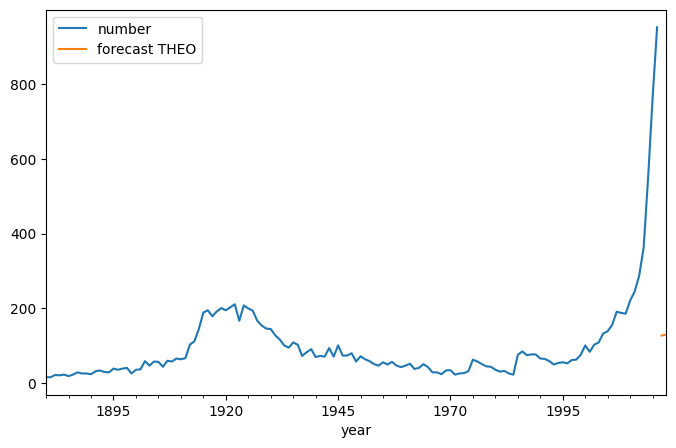

In [186]:
df_Theo.plot(figsize=(8,5), legend=True)
forecast_theo.plot(legend=True);

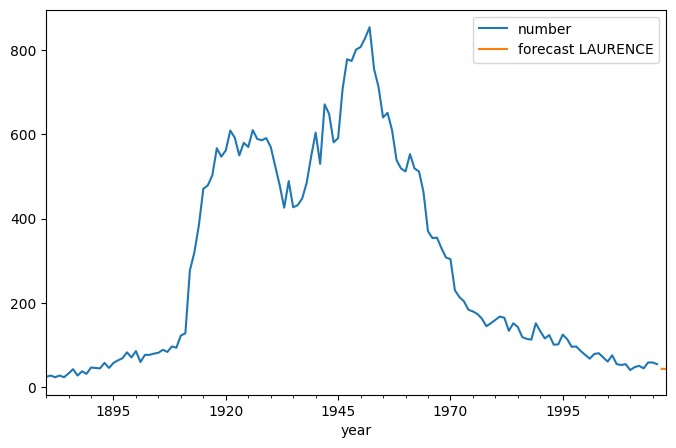

In [187]:

df_Laurence.plot(figsize=(8,5), legend=True)
forecast_laurence.plot(legend=True);


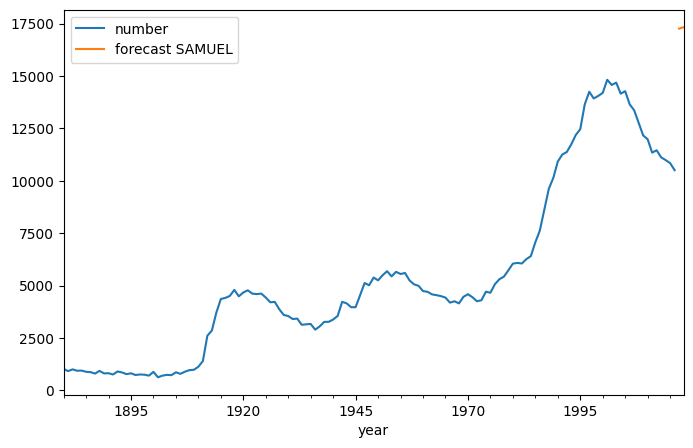

In [189]:

df_Samuel.plot(figsize=(8,5), legend=True)
forecast_samuel.plot(legend=True);
plt.legend(loc='upper left')

In [ ]:
# INTERPRETATION

# The Model for the Name Laurence has correct predictions: 
#     - Auto_arima: the model coefficients from the entire dataset show Pvalues<0.5 : GOOD
#     - the fitted model coefficients on the trained data have also Pvalues<0.5 : BAD
#     - The Predicted data match the trend of the test dataset : GOOD
#     - the 2 years predictions are also in line of the entire dataset : GOOD
    
# The Models for the Names Theo and Samuel do not show correct predictions:
#     - Auto_arima: the model coefficients from the entire dataset show Pvalues<0.5 : GOOD
#     - the fitted models coefficients on the trained data only, shows Pvalues>0.5 : BAD
#     - The Predicted data do not match the trend of the test dataset: BAD
#     - the 2 years predictions are NOT in line of the entire dataset: BAD
#     For these 2 names, the trends initiated since 2002 was not reflected in the fitted model from the trained_data
#     We can confirm the 2 models do not fit the training data because their Pvalues>0.05
#     If we have wanted to fit the reality we should not have fitting the models on the entire dataset.
    
#     This means that if our model, does not include the latest trends to fit our model,
#     can nor predict near past trends,  and can not forecast future trends
    

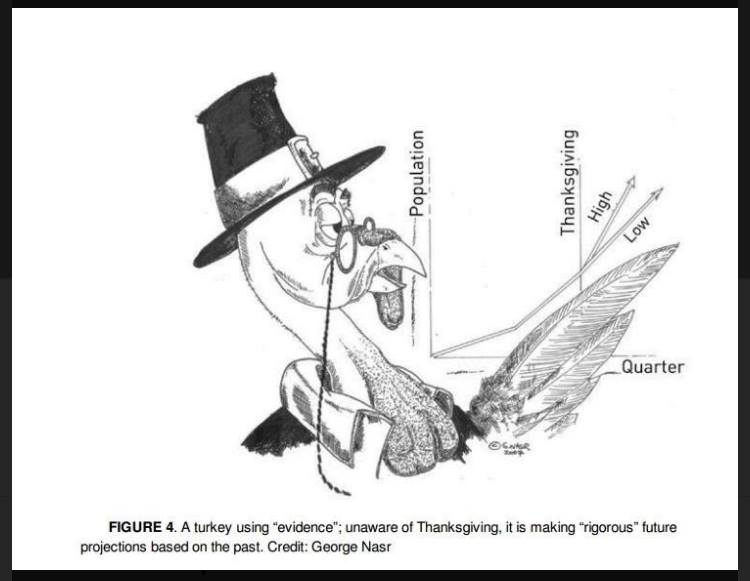

In [210]:
# Knowing this, let's try to refit our model to the entire dataset for Theo
# then forecast the next 2 years

start_theo = len(df_Theo)-1
end_theo = len(df_Theo) -1 + 2 # We want to predict our entire DF - 1 because the end is *inclusive*. 



In [193]:
model_theo = ARIMA(df_Theo, order=(2,2,2)).fit()

model_theo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 number   No. Observations:                  137
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -604.968
Date:                Sat, 18 Mar 2023   AIC                           1219.936
Time:                        18:23:02   BIC                           1234.462
Sample:                    01-01-1880   HQIC                          1225.839
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6232      0.155      4.008      0.000       0.318       0.928
ar.L2         -0.3461      0.175     -1.982      0.047      -0.688      -0.004
ma.L1         -1.0654      0.148     -7.182      0.000      -1.356      -0.775
ma.L2          0.7425      0.097      7.647      0.000       0.552       0.933
sigma2       454.5081     36.609     12.415      0.000     382.755     526.261
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               286.91
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                             1.25
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [211]:
forecast_theo2 = model_theo.predict(start=start_theo, end=end_theo, typ='levels').rename('accurate Forecast THEO')

<Axes: xlabel='year'>

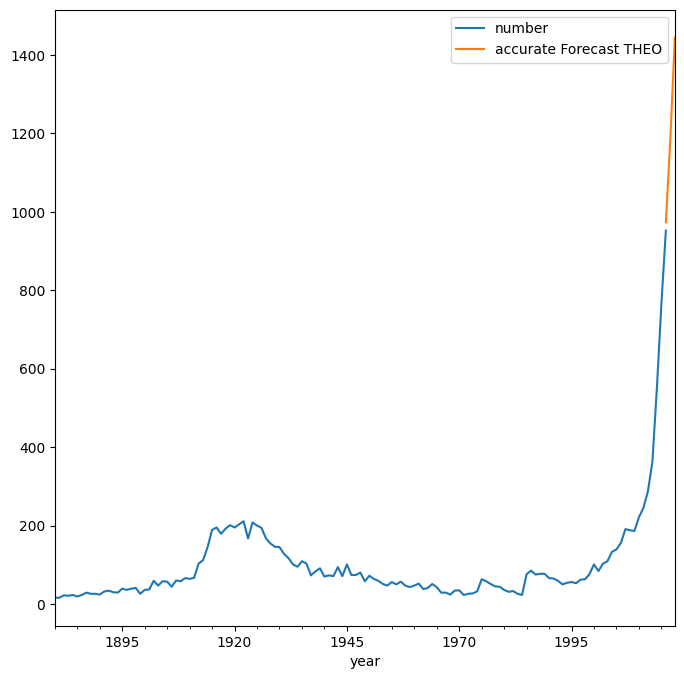

In [212]:
df_Theo.plot(figsize=(8,8),legend=True)
forecast_theo2.plot(legend=True)

# The forecast match the continuation of the present trend: GOOD

## Exercise 2: 

Using ARIMA-based models and the `HospitalityEmployees.csv` file, forecast the number of *Hospitality Employees* **1** year into the future. Provide an interpretation of your findings

**Note:** Make sure to perform the necessary exploratory steps as well as to visualize your data & evaluate your results. 

### 2.1 - Get the dataframe

In [2]:
# exercise 2
df_hosp = pd.read_csv('../data/HospitalityEmployees.csv')

In [3]:
df_hosp

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7
...,...,...
343,8/1/2018,2019.1
344,9/1/2018,1992.5
345,10/1/2018,1984.3
346,11/1/2018,1990.1


In [4]:
df_hosp.index = pd.to_datetime(df_hosp.Date)
df_hosp = df_hosp[['Employees']]
df_hosp

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7
...,...
2018-08-01,2019.1
2018-09-01,1992.5
2018-10-01,1984.3


### 2.2 Decompose the trends/ seasons using - seasonal_decompose -

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

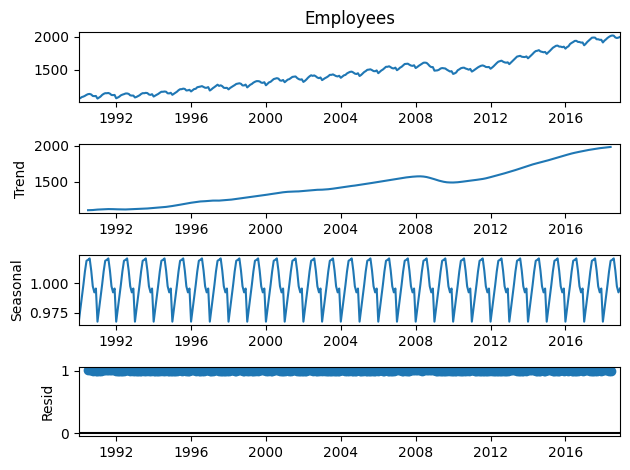

In [6]:
seasonal_decompose(df_hosp['Employees'],model='mul',).plot();

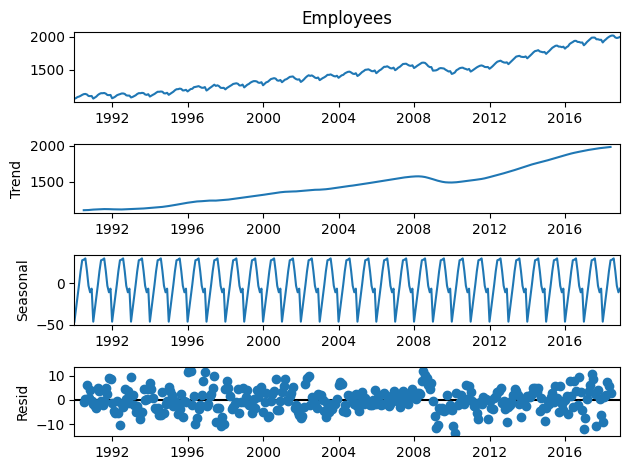

In [7]:
seasonal_decompose(df_hosp['Employees'],model='add',).plot();

#### We can immediately notice:
    - the season has a 1 year period
    - the trend is constant 
    - there is a discontinuation after 2008 (start of economic crisis)
    
#### let's get more accurate graphs to evaluate the seasonality and trend


- Before 2008:

<Axes: xlabel='Date'>

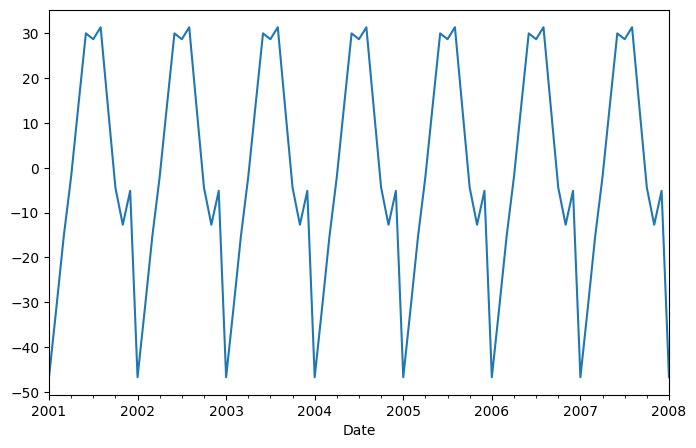

In [8]:
seasonal_decompose(df_hosp['Employees'].loc['2001-01-01':'2008-01-01']).seasonal.plot(figsize=(8,5))

<Axes: xlabel='Date'>

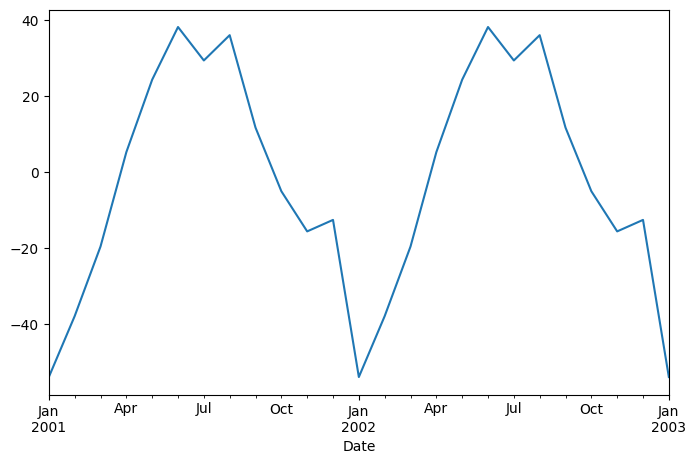

In [9]:
seasonal_decompose(df_hosp['Employees'].loc['2001-01-01':'2003-01-01']).seasonal.plot(figsize=(8,5))

- After 2008:

<Axes: xlabel='Date'>

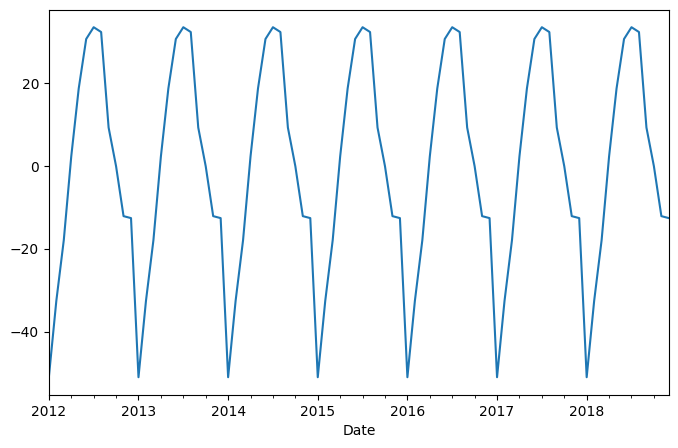

In [10]:
seasonal_decompose(df_hosp['Employees'].loc['2012-01-01':'2018-12-01']).seasonal.plot(figsize=(8,5))

<Axes: xlabel='Date'>

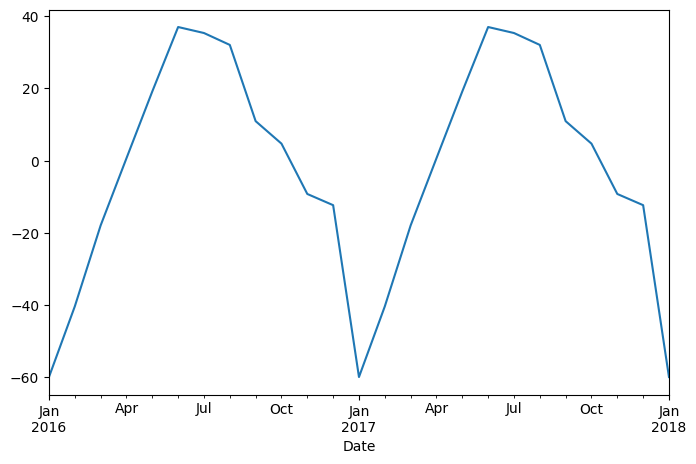

In [11]:
seasonal_decompose(df_hosp['Employees'].loc['2016-01-01':'2018-01-01']).seasonal.plot(figsize=(8,5))

### 2.3 Get a model 

- Since we have an exogenous data in 2008, we must indicate it to the model.
A new column called 'eco' is added to our dataFrame: 1 all the time except for 2008-2009 where it is set to 0.
- Use AUTO_ARIMA to determine the p,d,q, P,D,Q,M parameters to be passed to the SARIMAX model fitter.
- Split the dataset into Train / Test data. Also add train_exog and test_exog to be passed as parameter to fit the model.
- Check the predictions


In [12]:

#df_hosp['eco'] = np.zeros((348),dtype=int)
df_hosp['eco'] = np.ones((348),dtype=int)
df_hosp['eco'].loc['2008':'2009']=0 #Economic crisis
df_hosp['eco'] = df_hosp['eco'].astype(int)
df_hosp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 1990-01-01 to 2018-12-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Employees  348 non-null    float64
 1   eco        348 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 16.3 KB


In [13]:
df_hosp_exog = df_hosp[['eco']]

In [14]:
auto_arima(df_hosp[['Employees']],exogenous=df_hosp_exog ,trace=True,seasonal=True, m=12).summary()
#ARIMA(1,1,2)(1,0,1)[12]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2213.552, Time=2.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2974.636, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2707.381, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2980.790, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2340.935, Time=1.60 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2327.605, Time=3.67 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=5.73 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.29 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2264.870, Time=3.09 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.23 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2210.613, Time=1.82 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2703.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 19 Mar 2023   AIC                           2208.504
Time:                                      15:59:48   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.045     20.529      0.000       0.836       1.013
ma.L1         -0.9441      0.069    -13.612      0.000      -1.080      -0.808
ma.L2          0.1287      0.059      2.164      0.030       0.012       0.245
ar.S.L12       0.9972      0.001    702.266      0.000       0.994       1.000
ma.S.L12      -0.7489      0.043    -17.340      0.000      -0.834      -0.664
sigma2        29.3062      1.718     17.055      0.000      25.938      32.674
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
train = df_hosp.iloc[:-12]
test = df_hosp.iloc[-12:] #we test on the last year

train_exog = train.iloc[:-12]
test_exog = test.iloc[-12:]

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [23]:
# training the model on the train data
model1 = SARIMAX(train['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12),exog=train[['eco']]).fit(disp=0)
model1.summary()

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.052
Date:                              Sun, 19 Mar 2023   AIC                           2130.105
Time:                                      16:00:38   BIC                           2156.803
Sample:                                  01-01-1990   HQIC                          2140.749
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
eco           -0.1445      0.937     -0.154      0.877      -1.981       1.692
ar.L1          0.9238      0.044     21.162      0.000       0.838       1.009
ma.L1         -0.9582      0.070    -13.602      0.000      -1.096      -0.820
ma.L2          0.1497      0.061      2.463      0.014       0.031       0.269
ar.S.L12       0.9973      0.001    693.581      0.000       0.994       1.000
ma.S.L12      -0.7515      0.044    -17.071      0.000      -0.838      -0.665
sigma2        28.7638      1.686     17.056      0.000      25.458      32.069
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.06
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
start = len(train)
end = start + len(test) -1

In [25]:
# check predictions vs Test dataset

predictions1 = model1.predict(start, end, exog=test_exog[['eco']] ,typ='levels').rename('model1 predictions')

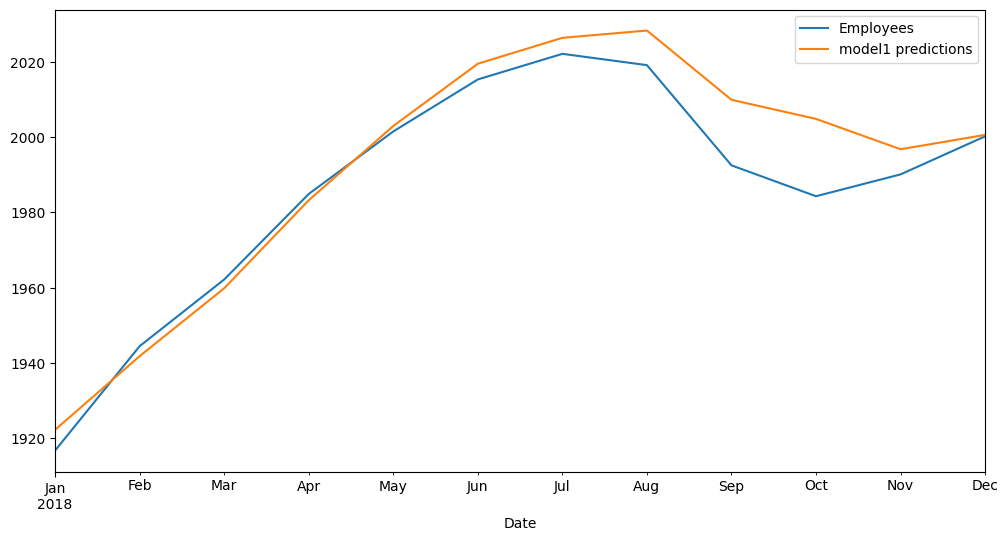

In [29]:
#df_hosp['Employees'].iloc[-12:].plot(legend=True,figsize=(12,6))
df_hosp['Employees'].iloc[start:].plot(legend=True,figsize=(12,6))
predictions1.plot(legend=True);

In [30]:
#Let's evaluate the model

from statsmodels.tools.eval_measures import rmse
print('RMSE:',rmse(df_hosp['Employees'].iloc[-12:],predictions1))


print('Test Mean:', df_hosp['Employees'].iloc[-12:].mean())
print(f'Prediction Mean: {predictions1.mean()}')

RMSE: 8.833238271996926
Test Mean: 1986.125
Prediction Mean: 1991.3663568191412


The predictions against the test dataset are in line.


It seems the exog is playing a great role on the prediction. Prior using exog parameter, I ran the model and prediction without it, and the RMSE was 2 times bigger ( ~ 16).

Let's explore the forecast and add the 'eco' data for exog has required 

#### We want to forecast on 1 year after the last data of the dataset.
- Let's fit the model on the entire dataset, and predict (forecast) what the output is going to be 1 year after the last date of the dataset

In [31]:
# Let's fit on the entire dataset :
model2 = SARIMAX(df_hosp['Employees'], order=(1,1,2), seasonal_order=(1,0,1,12), exog=df_hosp[['eco']]).fit(disp=0)

#model.summary()
start2 = 0
end2 = len(df_hosp)-1
prediction2 = model2.predict(start=start2, end=end2, typ='levels').rename('SARIMA Forecast')

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


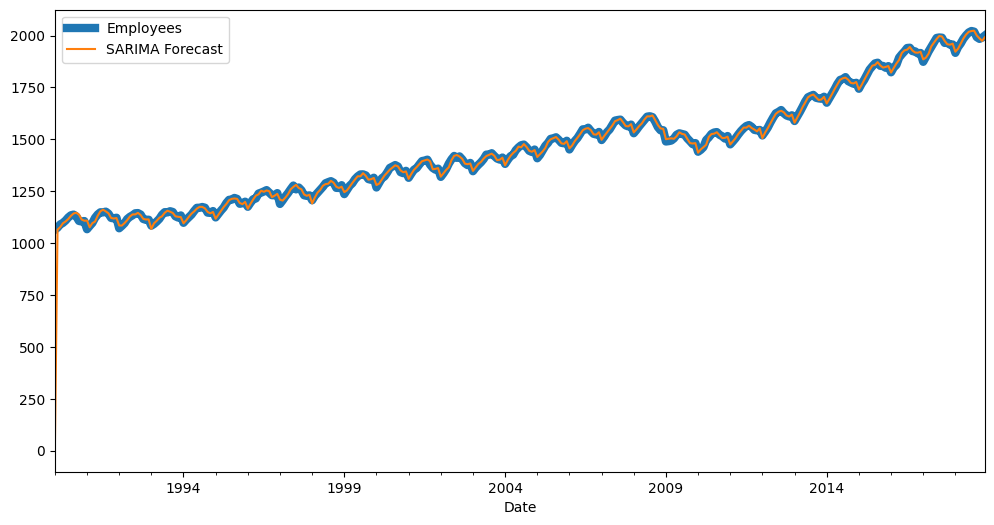

In [33]:
df_hosp['Employees'].plot(legend=True,figsize=(12,6), linewidth=6)
prediction2.plot(legend=True);

Now that we have checked the updated model fits to the original data, let's forecast 1 year after.
- we have to add the required 'eco' additional data for the year. We set this year as -No crisis-: 'eco"=1

In [34]:
# Forecast on 1 year ( Without additional exogenous data throws an error)

start3 = 0
end3 = len(df_hosp)+11
prediction3 = model2.predict(start=start3, end=end3, typ='levels').rename('SARIMA Forecast')

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

#### Let's add more exogenous data to the dataset, has required by the model

In [ ]:
# It seems the model needs more Exogenous values as input 


# df_hosp['eco'] = np.ones((348),dtype=int)
# df_hosp.loc['2008':'2009'].iloc[=0 #Economic crisis



In [35]:
#forecasted_dates = df_hosp.concat(df_hosp, forecasted_dates)

In [36]:

additional_dates = pd.date_range(start='2019-01-01', end='2019-12-01', freq='MS')  
additional_dates

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [37]:
additional_exog = [1 for i in additional_dates ]
additional_exog 
additional_employees = [None for i in additional_dates ]

In [38]:
additional_df_hosp = pd.DataFrame({'date':additional_dates, 'Employees':additional_employees, 'eco':additional_exog})
additional_df_hosp.index = pd.to_datetime(additional_df_hosp.date)
additional_df_hosp = additional_df_hosp[['Employees','eco']]


In [39]:
df_hosp_forecast = pd.concat([df_hosp, additional_df_hosp])
df_hosp_forecast

,Employees,eco
1990-01-01,1064.5,1
1990-02-01,1074.5,1
1990-03-01,1090.0,1
1990-04-01,1097.4,1
1990-05-01,1108.7,1
...,...,...
2019-08-01,NaN,1
2019-09-01,NaN,1
2019-10-01,NaN,1
2019-11-01,NaN,1


In [40]:
start3 = 0
end3 = len(df_hosp)+11
prediction3 = model2.predict(start=start3, end=end3, typ='levels', exog=additional_df_hosp[['eco']]).rename('SARIMA Forecast')

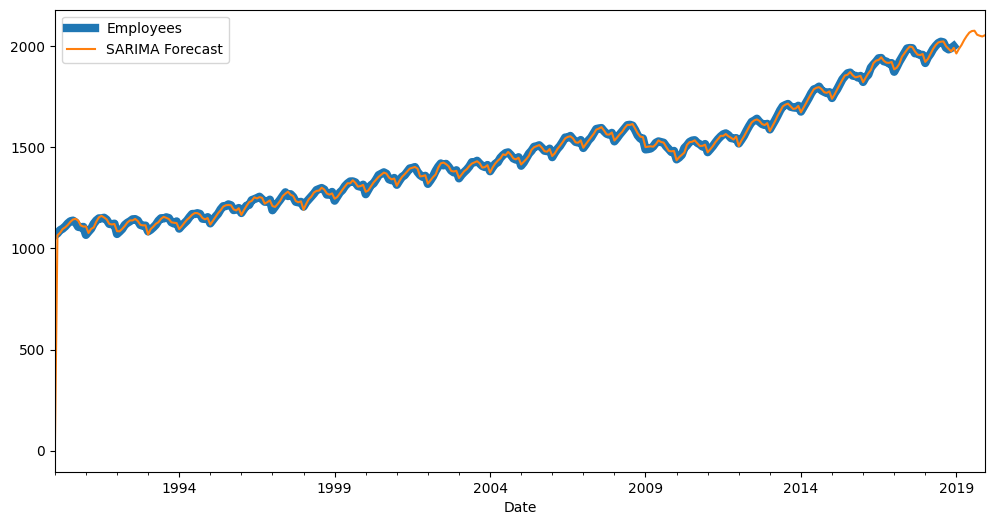

In [41]:
df_hosp['Employees'].plot(legend=True,figsize=(12,6), linewidth=6)
prediction3.plot(legend=True);

CONCLUSION:
- We have experienced creating a model with an extra parameter: Exogneous ( exog)
- Getting the parameters from AUTO_ARIMA
- Passing the parameters to SARIMAX in order to train a model
- Checking the model predictions still fit the test data
- forecasting one year after the end of the dataset where we had to pass the extra exogenous data.

For having tested the model before and after using the exogenous parameters, it seems the model fits better( based on the RMSE result) when using the EXOG parameter.